# Задание 2: Решающие деревья

# Import Libraries

In [1]:
import string
import math
import sys
import os

import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline 

## Decision-Tree in Scikit-learn example

In [2]:
# Initialize data and lables
X = np.array([[1,2],[3,4],[5,6]])
y = np.array([0,1,0])

# Initialize the model
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [3]:
# Get important features
importances = clf.feature_importances_
print(importances)

[0. 1.]


In [4]:
# Check NaN
print(np.isnan(X))

[[False False]
 [False False]
 [False False]]


# Инструкция по выполнению

**1. Загрузите выборку из файла titanic.csv с помощью пакета Pandas.**

In [5]:
# Declare path to database
root_path = '.'
data_path = os.path.join(root_path,'data')

In [6]:
# Declare dataset
titanic = os.path.join(data_path, 'titanic.csv')

In [7]:
# Load the data
data = pd.read_csv(titanic, index_col='PassengerId')

* Describe the data

In [8]:
data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,890.000000,890.000000,890,890,713.000000,890.000000,890.000000,890,890.000000,204,888
unique,NaN,NaN,890,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Moussa, Mrs. (Mantoura Boulos)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,576,NaN,NaN,NaN,7,NaN,4,643
mean,0.384270,2.308989,NaN,NaN,29.711318,0.523596,0.382022,NaN,32.157808,NaN,NaN
std,0.486696,0.836477,NaN,NaN,14.533034,1.103224,0.806409,NaN,49.702054,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.903100,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
data.count()

Survived    890
Pclass      890
Name        890
Sex         890
Age         713
SibSp       890
Parch       890
Ticket      890
Fare        890
Cabin       204
Embarked    888
dtype: int64

__2. Оставьте в выборке четыре признака: класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex).__

In [10]:
# All columns
columns = data.columns
print(columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
selected_columns = ['Pclass','Fare','Age','Sex']
select_data = data[selected_columns]

In [12]:
select_data.head()

,Pclass,Fare,Age,Sex
PassengerId,,,,
1,3,7.2500,22.0,male
2,1,71.2833,38.0,female
3,3,7.9250,26.0,female
4,1,53.1000,35.0,female
5,3,8.0500,35.0,male


__3. Обратите внимание, что признак Sex имеет строковые значения.__

Yes, Sex record has string type.

Get unique values

In [13]:
unique_sex = select_data['Sex'].unique()
print(unique_sex)

['male' 'female']


__4. Выделите целевую переменную — она записана в столбце Survived.__

In [13]:
# Get Survived series
survived = data['Survived']
survived

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 890, dtype: int64

In [14]:
# View unique values
survived.unique()

array([0, 1])

__5. В данных есть пропущенные значения — например, для некоторых пассажиров неизвестен их возраст. Такие записи при чтении их в pandas принимают значение nan. Найдите все объекты, у которых есть пропущенные признаки, и удалите их из выборки.__

__View heatmap__

In [15]:
sns.set()

In [17]:
# sns.heatmap(select_data)

__Data missing handling__

In [18]:
select_data.isnull()

,Pclass,Fare,Age,Sex
PassengerId,,,,
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
887,False,False,False,False
888,False,False,False,False
889,False,False,True,False


In [24]:
# Missing values Pclass
print("Missing values in Pclass: ", select_data['Pclass'].isnull().sum())

Missing values in Pclass:  0


In [26]:
# Missing values in Fare
print("Missing values in Fare: ", select_data['Fare'].isnull().sum())

Missing values in Fare:  0


In [27]:
# Missting values in Age
print("Missing values in Ages: ", select_data['Age'].isnull().sum())

Missing values in Ages:  177


In [28]:
# Missing values in Sex
print("Missing values int Sex: ", select_data['Sex'].isnull().sum())

Missing values int Sex:  0


--> Conclusion: For selected data, there is 177 values is missed in Age columns

In [30]:
# Find all Nan value in selected data
null_ages = select_data[select_data['Age'].isnull()]

In [32]:
null_ages.describe()

,Pclass,Fare,Age
count,177.000000,177.000000,0.0
mean,2.598870,22.158567,NaN
std,0.763216,31.874608,NaN
min,1.000000,0.000000,NaN
25%,3.000000,7.750000,NaN
50%,3.000000,8.050000,NaN
75%,3.000000,24.150000,NaN
max,3.000000,227.525000,NaN


In [35]:
# Print missing value in class 1
print("Amount of missing ages in class 1: ", null_ages[null_ages['Pclass']==1].count())

Amount of missing ages in class 1:  Pclass    30
Fare      30
Age        0
Sex       30
dtype: int64


In [36]:
# Print missing value in class 2
print("Amount of missing ages in class 1: ", null_ages[null_ages['Pclass']==2].count())

Amount of missing ages in class 1:  Pclass    11
Fare      11
Age        0
Sex       11
dtype: int64


In [37]:
# Print missing value in class 3
print("Amount of missing ages in class 1: ", null_ages[null_ages['Pclass']==3].count())

Amount of missing ages in class 1:  Pclass    136
Fare      136
Age         0
Sex       136
dtype: int64


__Get not-null values from selected data__

In [46]:
# Just simple take dropna function in Pandas to drop all NaN values in selected data
not_null_data = select_data.dropna()

In [47]:
not_null_data.describe()

,Pclass,Fare,Age
count,713.000000,713.000000,713.000000
mean,2.237027,34.640088,29.711318
std,0.838791,52.936078,14.533034
min,1.000000,0.000000,0.420000
25%,1.000000,8.050000,20.000000
50%,2.000000,15.741700,28.000000
75%,3.000000,33.000000,38.000000
max,3.000000,512.329200,80.000000


In [48]:
not_null_data.count()

Pclass    713
Fare      713
Age       713
Sex       713
dtype: int64

In [49]:
null_ages.count()

Pclass    177
Fare      177
Age         0
Sex       177
dtype: int64

__Обучите решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию (речь идет о параметрах конструктора DecisionTreeСlassifier).__

__Get labels by survived fields__

In [64]:
indexes = not_null_data.index.values
indexes.size

713

In [69]:
labels = data[data.index.isin(indexes)]['Survived']

In [72]:
labels.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [107]:
# Assign data 
X = not_null_data
y = labels
X[X['Sex']=='male']=0
X[X['Sex']=='female']=1

/home/ben/miniconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/ben/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/ben/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se

In [108]:
# Split data for traning and testing
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
train_data.head()

,Pclass,Fare,Age,Sex
PassengerId,,,,
176,0,0.0,0.0,0
38,0,0.0,0.0,0
59,1,1.0,1.0,1
58,0,0.0,0.0,0
97,0,0.0,0.0,0


In [110]:
train_label.head()

PassengerId
176    0
38     0
59     1
58     0
97     0
Name: Survived, dtype: int64

In [111]:
test_data.head()

,Pclass,Fare,Age,Sex
PassengerId,,,,
151,0,0.0,0.0,0
409,0,0.0,0.0,0
54,1,1.0,1.0,1
371,0,0.0,0.0,0
819,0,0.0,0.0,0


In [112]:
test_label.head()

PassengerId
151    0
409    0
54     1
371    1
819    0
Name: Survived, dtype: int64

__Training the model using DecisionTreeClassifier__

In [135]:
model = DecisionTreeClassifier(random_state=241)
model.fit(train_data, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=241, splitter='best')

In [136]:
model.classes_

array([0, 1])

__Predict ratio of survived and died passengers__

In [137]:
y_pred = model.predict(test_data)

In [138]:
y_true = test_label

In [139]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, classification_report

In [140]:
accuracy_score(y_pred=y_pred, y_true=y_true)

0.7429906542056075

In [141]:
precision_score(y_pred=y_pred, y_true=y_true)

0.7349397590361446

In [142]:
roc_auc_score(y_score=y_pred, y_true=y_true)

0.7328014184397162

In [143]:
print(classification_report(y_pred=y_pred, y_true=y_true))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       120
           1       0.73      0.65      0.69        94

    accuracy                           0.74       214
   macro avg       0.74      0.73      0.74       214
weighted avg       0.74      0.74      0.74       214



__Normalize data__

In [144]:
from sklearn.preprocessing import Normalizer
nomalizer = Normalizer()
X_normalize = nomalizer.fit_transform(X)

In [145]:
X_normalize

array([[0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, 0.5],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ]])

In [146]:
train_data_normalized, test_data_normalized, train_label_normalized, test_label_normalized = train_test_split(X_normalize, y, test_size=0.3, random_state=42)

In [147]:
# train data normalized
model_normalized = DecisionTreeClassifier(random_state=241)
model_normalized.fit(train_data_normalized, train_label_normalized)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=241, splitter='best')

In [150]:
# test again in data normalized
y_pred_normalized = model_normalized.predict(test_data_normalized)
y_true_normalized = test_label_normalized

In [151]:
# print again all results
print('Accuracy score: ', accuracy_score(y_pred_normalized, y_true_normalized))
print('Precision score: ', precision_score(y_pred_normalized, y_true_normalized))
print('Classification report: \n',classification_report(y_pred_normalized, y_true_normalized))

Accuracy score:  0.7429906542056075
Precision score:  0.648936170212766
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       131
           1       0.65      0.73      0.69        83

    accuracy                           0.74       214
   macro avg       0.73      0.74      0.74       214
weighted avg       0.75      0.74      0.75       214



__6. Вычислите важности признаков и найдите два признака с наибольшей важностью. Их названия будут ответами для данной задачи.__

In [157]:
important_features = model.feature_importances_

In [159]:
important_features

array([1., 0., 0., 0.])

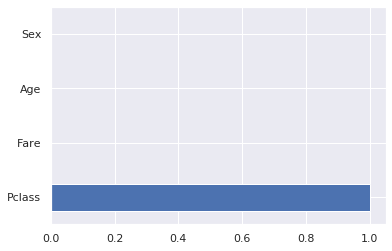

In [155]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

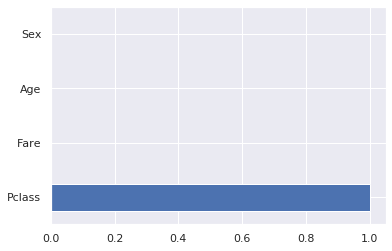

In [156]:
feat_importances_normalized = pd.Series(model_normalized.feature_importances_, index=X.columns)
feat_importances_normalized.nlargest(10).plot(kind='barh')
plt.show()

__--> Passengers in 1 class have more chance to live than others.__